In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "^spx_d.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "^spx_d.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "^spx_d.csv"
print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

Path exists: True


,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [2]:
# filter DatetimeIndex higher than year 1957
df = df[df.index > '1957-01-01']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17355 entries, 1957-01-02 to 2025-12-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    17355 non-null  float64
 1   high    17355 non-null  float64
 2   low     17355 non-null  float64
 3   close   17355 non-null  float64
 4   volume  17355 non-null  float64
dtypes: float64(5)
memory usage: 813.5 KB


In [3]:
df.shape

(17355, 5)

In [4]:
# # plot close prices over time
# plt.figure(figsize=(14, 7))
# plt.plot(df.index, df['close'], label='Close Price')
# plt.title('S&P 500 Close Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid()
# plt.show()

In [5]:
# calculate daily returns
df['daily_return'] = df['close'].pct_change()

# fill NaN values
df.fillna(0, inplace=True)

df.head()

,open,high,low,close,volume,daily_return
date,,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0,0.000000
1957-01-03,46.60,46.60,46.60,46.60,1255556.0,0.008658
1957-01-04,46.66,46.66,46.66,46.66,1505556.0,0.001288
1957-01-07,46.42,46.42,46.42,46.42,1388889.0,-0.005144
1957-01-08,46.25,46.25,46.25,46.25,1238889.0,-0.003662


In [6]:
"""
"Buy the dip" strategy implementation:

1) Identify the dips: Define a dip as a negative daily return. 
Create a new column in the dataframe to signal when a dip occurs. Example, signal 1 the day after a negative return.

2) Buy signal: When a dip is identified, generate a buy signal at open price of the next day. 
This can be a simple binary signal (1 for buy, 0 for no buy).

3) Holding period: Define a holding period after the buy signal. All positions will be held for the current day only.
Closed at the close price of the same day.

4) Backtesting: Implement a backtesting framework to evaluate the performance of the strategy over historical data. 
Additionally, plot the signals on the price chart for visual confirmation.

5) Performance metrics: Calculate key performance metrics such as total return, maximum drawdown, and win rate.

# =========================================================
This is not a tradable strategy, just an academic exercise.
# =========================================================
""";
# add year column
df['year'] = df.index.year

# add dip signal column
df['dip_signal'] = np.where(df['daily_return'] < 0, 1, 0)

# shift the signal to the next day to represent buy signal at open after dip
df['buy_signal'] = df['dip_signal'].shift(1)

# fill nan values
df.fillna(0, inplace=True)

# calculate strategy returns
df['strategy_return'] = df['buy_signal'] * df['daily_return']

df.head(10)

,open,high,low,close,volume,daily_return,year,dip_signal,buy_signal,strategy_return
date,,,,,,,,,,
1957-01-02,46.20,46.20,46.20,46.20,1088889.0,0.000000,1957,0,0.0,0.000000
1957-01-03,46.60,46.60,46.60,46.60,1255556.0,0.008658,1957,0,0.0,0.000000
1957-01-04,46.66,46.66,46.66,46.66,1505556.0,0.001288,1957,0,0.0,0.000000
1957-01-07,46.42,46.42,46.42,46.42,1388889.0,-0.005144,1957,1,0.0,-0.000000
1957-01-08,46.25,46.25,46.25,46.25,1238889.0,-0.003662,1957,1,1.0,-0.003662
1957-01-09,46.16,46.16,46.16,46.16,1294444.0,-0.001946,1957,1,1.0,-0.001946
1957-01-10,46.27,46.27,46.27,46.27,1372222.0,0.002383,1957,0,1.0,0.002383
1957-01-11,46.18,46.18,46.18,46.18,1300000.0,-0.001945,1957,1,0.0,-0.000000
1957-01-14,45.86,45.86,45.86,45.86,1305556.0,-0.006929,1957,1,1.0,-0.006929


In [7]:
# years list included in the dataframe
years = df['year'].unique().tolist()

# select last year
last_year = years[-1]

# filter dataframe for last year only
df_last_year = df[df['year'] == last_year]

In [8]:
last_year

2025

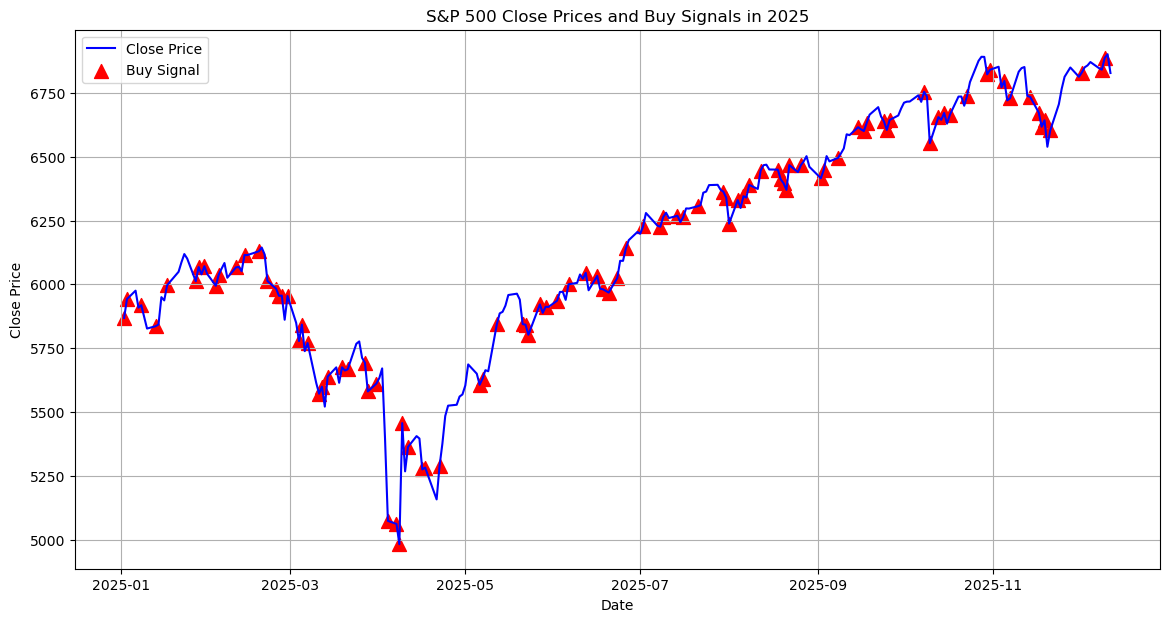

In [9]:
# plot close prices and buy signals for the last year
plt.figure(figsize=(14, 7))
plt.plot(df_last_year.index, df_last_year['close'], label='Close Price', color='blue')
plt.scatter(df_last_year.index[df_last_year['buy_signal'] == 1], df_last_year['close'][df_last_year['buy_signal'] == 1], 
            label='Buy Signal', color='red', marker='^', s=100) 
plt.title(f'S&P 500 Close Prices and Buy Signals in {last_year}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

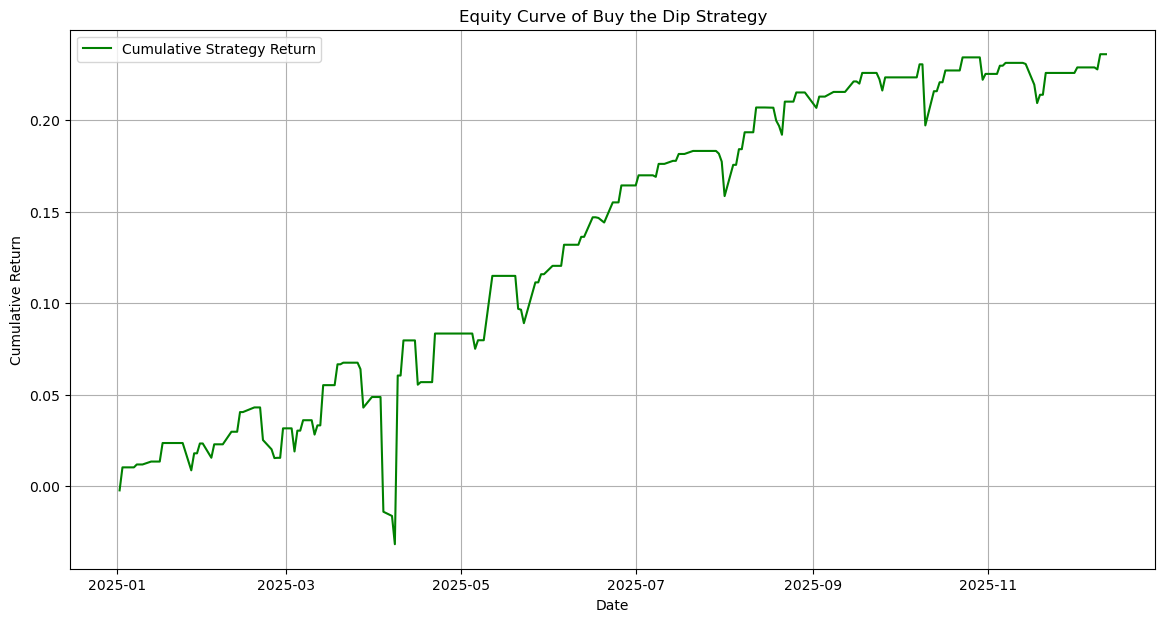

In [10]:
# plot equity curve as cumulative simple returns of strategy_return
df_last_year['cumulative_strategy_return'] = (1 + df_last_year['strategy_return']).cumprod() - 1
plt.figure(figsize=(14, 7))
plt.plot(df_last_year.index, df_last_year['cumulative_strategy_return'], label='Cumulative Strategy Return', color='green')
plt.title('Equity Curve of Buy the Dip Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

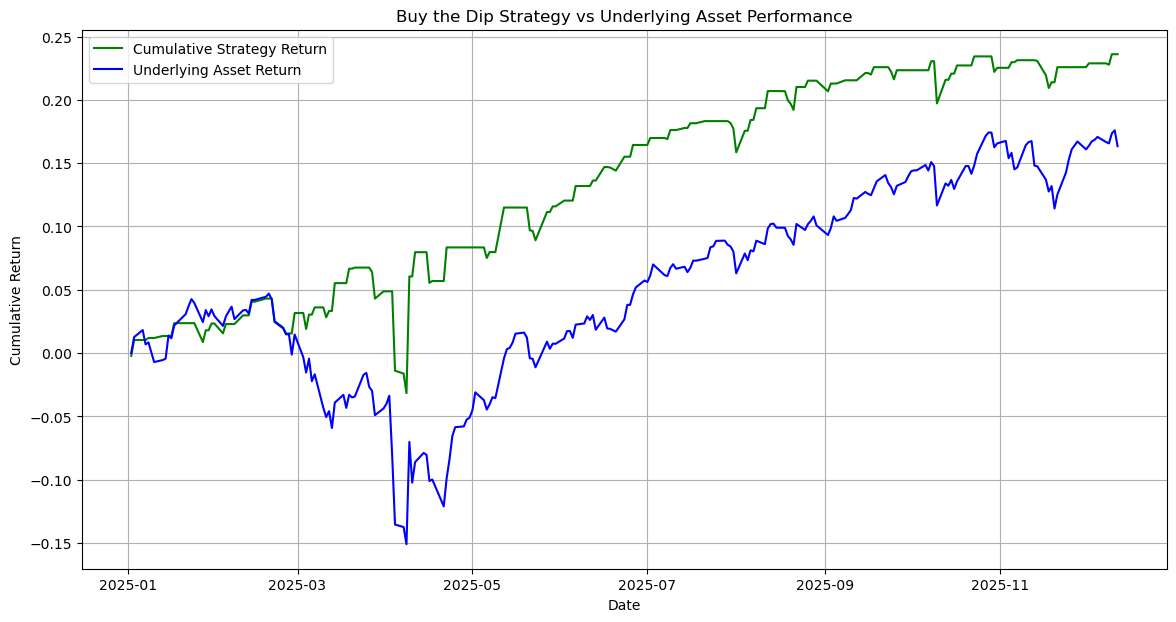

In [11]:
# plor df_last_year.cumulative_strategy_return and df_last_year.close on the same yaxis, comparing the buy the dip strategy performance against the underlying asset performance
plt.figure(figsize=(14, 7))
plt.plot(df_last_year.index, df_last_year['cumulative_strategy_return'], label='Cumulative Strategy Return', color='green')
plt.plot(df_last_year.index, df_last_year['close'] / df_last_year['close'].iloc[0] - 1, label='Underlying Asset Return', color='blue')
plt.title('Buy the Dip Strategy vs Underlying Asset Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

## Explanation of the Plot Statement

This line creates a line chart showing the **percentage return** of an underlying asset over the last year.

### Breaking Down the Components

The **x-axis** uses `df_last_year.index`, which typically contains dates or timestamps representing each data point in your one-year dataset.

The **y-axis** calculates the cumulative return using the formula:

$$\text{Return} = \frac{\text{Price}_t}{\text{Price}_0} - 1$$

Here, `df_last_year['close']` represents all closing prices, and `df_last_year['close'].iloc[0]` grabs the **first** closing price (the starting price). Dividing each price by this initial price and subtracting 1 converts absolute prices into **relative returns**. For example, if the price doubles, this yields $2/1 - 1 = 1$ (or 100% return).

### The Keyword Arguments

- **`label='Underlying Asset Return'`** — Assigns a legend label, useful when calling `plt.legend()` later to distinguish multiple lines.
- **`color='blue'`** — Sets the line color explicitly.

### Gotcha to Watch For

The expression `df_last_year['close'] / df_last_year['close'].iloc[0] - 1` relies on **operator precedence**—division happens before subtraction, which is the intended behavior. If you wanted to modify this logic, you'd need parentheses to change the order.

This visualization technique is common in finance because it allows you to compare assets with different price scales on the same chart by normalizing everything to percentage gains/losses from a common starting point.

In [12]:
# calculate total return of the strategy
total_return = df_last_year['cumulative_strategy_return'].iloc[-1] 
print(f'Total Return of Buy the Dip Strategy for Year {df_last_year.index.year[-1]}: {total_return * 100:.2f}%')

Total Return of Buy the Dip Strategy for Year 2025: 23.60%


In [13]:
# Add month column
df['month'] = df.index.month

# Group by month and calculate average and total strategy returns
monthly_stats = df.groupby('month').agg(
    avg_return=('strategy_return', 'mean'),
    total_return=('strategy_return', lambda x: (1 + x).prod() - 1),  # Compounded return
    trade_count=('buy_signal', 'sum')
).reset_index()

# Month names for x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_stats['month_name'] = monthly_stats['month'].apply(lambda x: month_names[x-1])

monthly_stats

,month,avg_return,total_return,trade_count,month_name
0,1,0.000135,0.176937,642.0,Jan
1,2,-0.000164,-0.218225,638.0,Feb
2,3,0.000370,0.646411,719.0,Mar
3,4,0.000129,0.153193,638.0,Apr
4,5,-0.000168,-0.245579,703.0,May
5,6,-0.000192,-0.266792,706.0,Jun
6,7,-0.000035,-0.076285,654.0,Jul
7,8,-0.000257,-0.351428,715.0,Aug
8,9,-0.000371,-0.427927,672.0,Sep
9,10,-0.000165,-0.300334,729.0,Oct


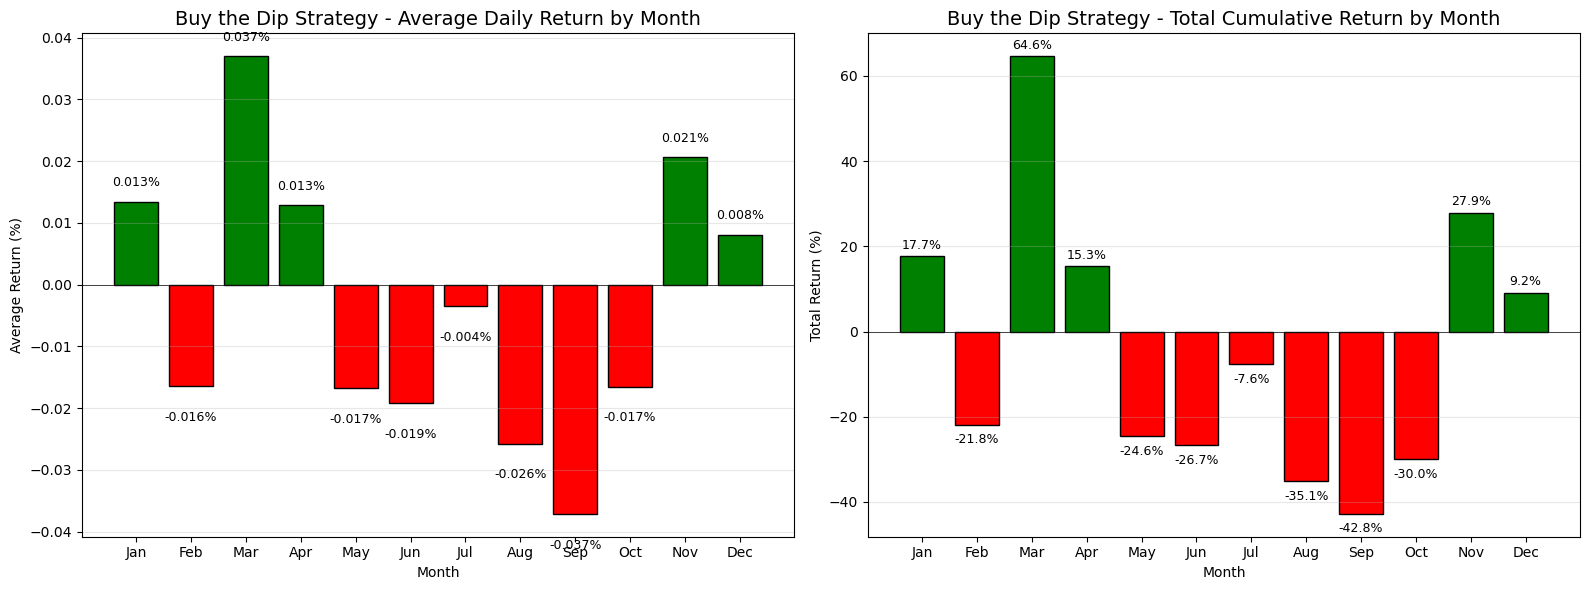

In [14]:
# Plot Average Returns by Month
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Colors based on positive/negative
colors_avg = ['green' if x >= 0 else 'red' for x in monthly_stats['avg_return']]
colors_total = ['green' if x >= 0 else 'red' for x in monthly_stats['total_return']]

# Average Returns
axes[0].bar(monthly_stats['month_name'], monthly_stats['avg_return'] * 100, color=colors_avg, edgecolor='black')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].set_title('Buy the Dip Strategy - Average Daily Return by Month', fontsize=14)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Return (%)')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (v, name) in enumerate(zip(monthly_stats['avg_return'], monthly_stats['month_name'])):
    axes[0].text(i, v * 100 + (0.002 if v >= 0 else -0.004), f'{v*100:.3f}%', 
                 ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)

# Total Returns
axes[1].bar(monthly_stats['month_name'], monthly_stats['total_return'] * 100, color=colors_total, edgecolor='black')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title('Buy the Dip Strategy - Total Cumulative Return by Month', fontsize=14)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Return (%)')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (v, name) in enumerate(zip(monthly_stats['total_return'], monthly_stats['month_name'])):
    axes[1].text(i, v * 100 + (1 if v >= 0 else -2), f'{v*100:.1f}%', 
                 ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

In [15]:
# Summary statistics
print("Buy the Dip Strategy - Monthly Statistics Summary")
print("=" * 60)
print(f"{'Month':<10} {'Avg Return':<15} {'Total Return':<15} {'Trades':<10}")
print("-" * 60)
for _, row in monthly_stats.iterrows():
    print(f"{row['month_name']:<10} {row['avg_return']*100:>10.3f}%     {row['total_return']*100:>10.1f}%     {int(row['trade_count']):>6}")
print("-" * 60)
print(f"{'Overall':<10} {monthly_stats['avg_return'].mean()*100:>10.3f}%     {monthly_stats['total_return'].sum()*100:>10.1f}%     {int(monthly_stats['trade_count'].sum()):>6}")

Buy the Dip Strategy - Monthly Statistics Summary
Month      Avg Return      Total Return    Trades    
------------------------------------------------------------
Jan             0.013%           17.7%        642
Feb            -0.016%          -21.8%        638
Mar             0.037%           64.6%        719
Apr             0.013%           15.3%        638
May            -0.017%          -24.6%        703
Jun            -0.019%          -26.7%        706
Jul            -0.004%           -7.6%        654
Aug            -0.026%          -35.1%        715
Sep            -0.037%          -42.8%        672
Oct            -0.017%          -30.0%        729
Nov             0.021%           27.9%        591
Dec             0.008%            9.2%        667
------------------------------------------------------------
Overall        -0.004%          -53.9%       8074


In [16]:
# Add day column
df['day'] = df.index.day

# Group by day and calculate average and total strategy returns
daily_stats = df.groupby('day').agg(
    avg_return=('strategy_return', 'mean'),
    total_return=('strategy_return', lambda x: (1 + x).prod() - 1),  # Compounded return
    trade_count=('buy_signal', 'sum')
).reset_index()

daily_stats.head()

,day,avg_return,total_return,trade_count
0,1,0.000911,0.595169,258.0
1,2,0.000175,0.087627,232.0
2,3,-0.000293,-0.162995,235.0
3,4,-0.000176,-0.104176,241.0
4,5,0.000088,0.035420,241.0


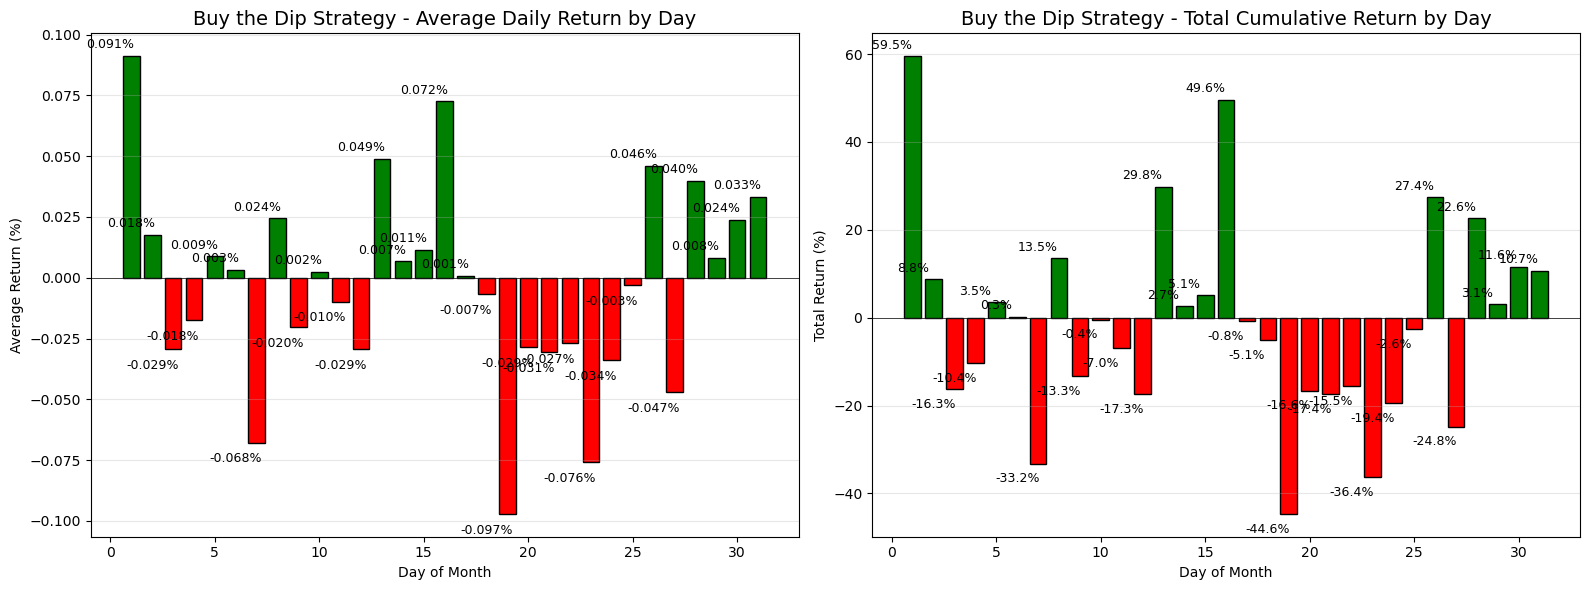

In [17]:
# Plot Average Returns by Day
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Colors based on positive/negative
colors_avg = ['green' if x >= 0 else 'red' for x in daily_stats['avg_return']]
colors_total = ['green' if x >= 0 else 'red' for x in daily_stats['total_return']]

# Average Returns
axes[0].bar(daily_stats['day'], daily_stats['avg_return'] * 100, color=colors_avg, edgecolor='black')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].set_title('Buy the Dip Strategy - Average Daily Return by Day', fontsize=14)
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Average Return (%)')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (v, name) in enumerate(zip(daily_stats['avg_return'], daily_stats['day'])):
    axes[0].text(i, v * 100 + (0.002 if v >= 0 else -0.004), f'{v*100:.3f}%', 
                 ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)

# Total Returns
axes[1].bar(daily_stats['day'], daily_stats['total_return'] * 100, color=colors_total, edgecolor='black')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title('Buy the Dip Strategy - Total Cumulative Return by Day', fontsize=14)
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('Total Return (%)')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (v, name) in enumerate(zip(daily_stats['total_return'], daily_stats['day'])):
    axes[1].text(i, v * 100 + (1 if v >= 0 else -2), f'{v*100:.1f}%', 
                 ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

In [18]:
# Summary statistics
print("Buy the Dip Strategy - Daily Statistics Summary")
print("=" * 60)
print(f"{'Day':<10} {'Avg Return':<15} {'Total Return':<15} {'Trades':<10}")
print("-" * 60)
for _, row in daily_stats.iterrows():
    print(f"{row['day']:<10} {row['avg_return']*100:>10.3f}%     {row['total_return']*100:>10.1f}%     {int(row['trade_count']):>6}")
print("-" * 60)
print(f"{'Overall':<10} {daily_stats['avg_return'].mean()*100:>10.3f}%     {daily_stats['total_return'].sum()*100:>10.1f}%     {int(daily_stats['trade_count'].sum()):>6}")

Buy the Dip Strategy - Daily Statistics Summary
Day        Avg Return      Total Return    Trades    
------------------------------------------------------------
1.0             0.091%           59.5%        258
2.0             0.018%            8.8%        232
3.0            -0.029%          -16.3%        235
4.0            -0.018%          -10.4%        241
5.0             0.009%            3.5%        241
6.0             0.003%            0.3%        258
7.0            -0.068%          -33.2%        252
8.0             0.024%           13.5%        301
9.0            -0.020%          -13.3%        281
10.0            0.002%           -0.4%        293
11.0           -0.010%           -7.0%        255
12.0           -0.029%          -17.3%        262
13.0            0.049%           29.8%        273
14.0            0.007%            2.7%        268
15.0            0.011%            5.1%        263
16.0            0.072%           49.6%        247
17.0            0.001%           -0.8

In [19]:
# Add week day column, 0=Monday, 6=Sunday
df['weekday'] = df.index.weekday

# Group by weekday and calculate average and total strategy returns
weekday_stats = df.groupby('weekday').agg(
    avg_return=('strategy_return', 'mean'),
    total_return=('strategy_return', lambda x: (1 + x).prod() - 1),  # Compounded return
    trade_count=('buy_signal', 'sum')
).reset_index()

weekday_stats.head()

,weekday,avg_return,total_return,trade_count
0,0,-0.000745,-0.926148,1470.0
1,1,0.000436,3.197534,1741.0
2,2,0.000261,1.294162,1703.0
3,3,-0.000107,-0.368480,1548.0
4,4,-0.000071,-0.279645,1612.0


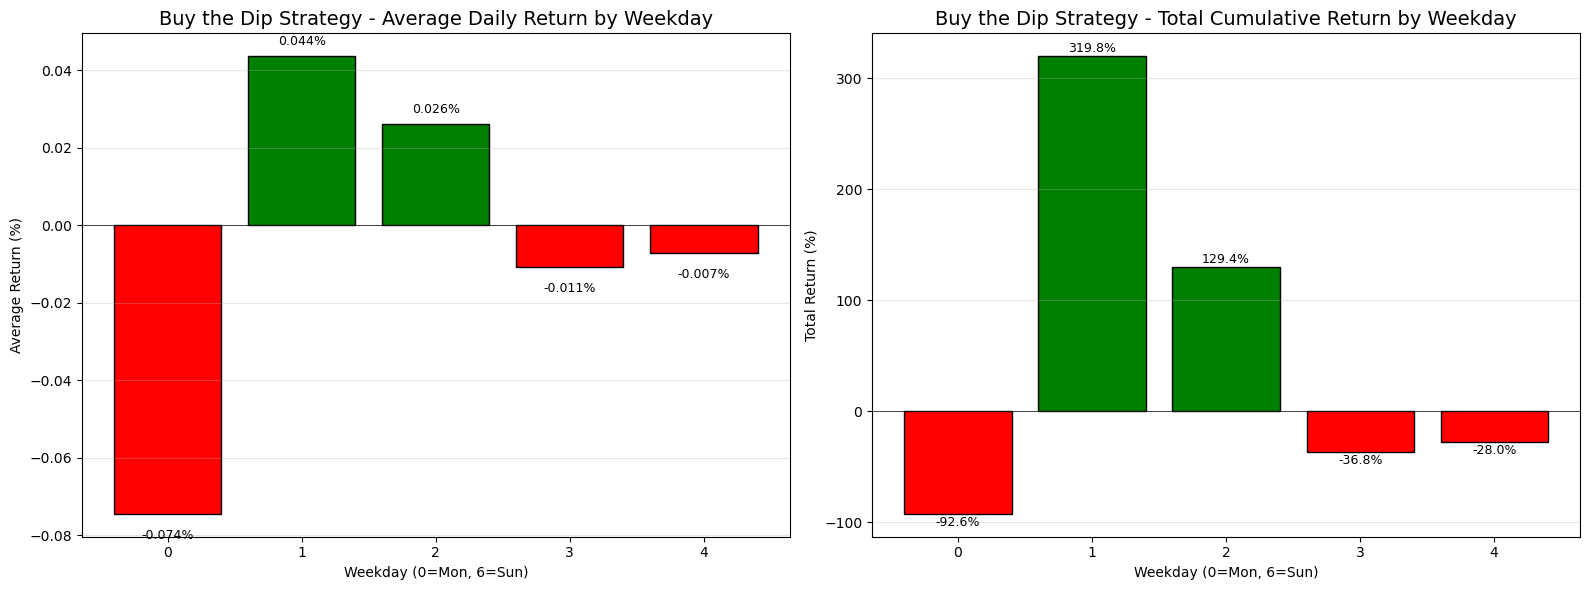

In [20]:
# Plot Average Returns by Weekday
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Colors based on positive/negative
colors_avg = ['green' if x >= 0 else 'red' for x in weekday_stats['avg_return']]
colors_total = ['green' if x >= 0 else 'red' for x in weekday_stats['total_return']]

# Average Returns
axes[0].bar(weekday_stats['weekday'], weekday_stats['avg_return'] * 100, color=colors_avg, edgecolor='black')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].set_title('Buy the Dip Strategy - Average Daily Return by Weekday', fontsize=14)
axes[0].set_xlabel('Weekday (0=Mon, 6=Sun)')
axes[0].set_ylabel('Average Return (%)')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (v, name) in enumerate(zip(weekday_stats['avg_return'], weekday_stats['weekday'])):
    axes[0].text(i, v * 100 + (0.002 if v >= 0 else -0.004), f'{v*100:.3f}%', 
                 ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)

# Total Returns
axes[1].bar(weekday_stats['weekday'], weekday_stats['total_return'] * 100, color=colors_total, edgecolor='black')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title('Buy the Dip Strategy - Total Cumulative Return by Weekday', fontsize=14)
axes[1].set_xlabel('Weekday (0=Mon, 6=Sun)')
axes[1].set_ylabel('Total Return (%)')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (v, name) in enumerate(zip(weekday_stats['total_return'], weekday_stats['weekday'])):
    axes[1].text(i, v * 100 + (1 if v >= 0 else -2), f'{v*100:.1f}%', 
                 ha='center', va='bottom' if v >= 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

In [21]:
# Summary statistics
print("Buy the Dip Strategy - Weekly Statistics Summary")
print("=" * 60)
print(f"{'Weekday':<10} {'Avg Return':<15} {'Total Return':<15} {'Trades':<10}")
print("-" * 60)
for _, row in weekday_stats.iterrows():
    print(f"{row['weekday']:<10} {row['avg_return']*100:>10.3f}%     {row['total_return']*100:>10.1f}%     {int(row['trade_count']):>6}")
print("-" * 60)
print(f"{'Overall':<10} {weekday_stats['avg_return'].mean()*100:>10.3f}%     {weekday_stats['total_return'].sum()*100:>10.1f}%     {int(weekday_stats['trade_count'].sum()):>6}")

Buy the Dip Strategy - Weekly Statistics Summary
Weekday    Avg Return      Total Return    Trades    
------------------------------------------------------------
0.0            -0.074%          -92.6%       1470
1.0             0.044%          319.8%       1741
2.0             0.026%          129.4%       1703
3.0            -0.011%          -36.8%       1548
4.0            -0.007%          -28.0%       1612
------------------------------------------------------------
Overall        -0.005%          291.7%       8074


In [22]:
# Calculate Win Ratio for Monthly, Weekly and Daily data
# Win = strategy_return > 0 when buy_signal == 1

# Filter only trading days (when buy_signal == 1)
trades = df[df['buy_signal'] == 1].copy()

# Monthly Win Ratio
monthly_wins = trades.groupby('month').apply(lambda x: (x['strategy_return'] > 0).sum() / len(x) * 100)
monthly_wins = monthly_wins.reset_index()
monthly_wins.columns = ['month', 'win_ratio']
monthly_wins['month_name'] = monthly_wins['month'].apply(lambda x: month_names[x-1])

# Weekday Win Ratio
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_wins = trades.groupby('weekday').apply(lambda x: (x['strategy_return'] > 0).sum() / len(x) * 100)
weekday_wins = weekday_wins.reset_index()
weekday_wins.columns = ['weekday', 'win_ratio']
weekday_wins['weekday_name'] = weekday_wins['weekday'].apply(lambda x: weekday_names[x])

# Daily Win Ratio
daily_wins = trades.groupby('day').apply(lambda x: (x['strategy_return'] > 0).sum() / len(x) * 100)
daily_wins = daily_wins.reset_index()
daily_wins.columns = ['day', 'win_ratio']

# Print Summary
print("Buy the Dip Strategy - Win Ratio Summary")
print("=" * 50)

print("\n Monthly Win Ratio:")
print("-" * 30)
for _, row in monthly_wins.iterrows():
    print(f"  {row['month_name']:<6}: {row['win_ratio']:.1f}%")

print("\n Weekday Win Ratio:")
print("-" * 30)
for _, row in weekday_wins.iterrows():
    print(f"  {row['weekday_name']:<6}: {row['win_ratio']:.1f}%")

print("\n Daily Win Ratio (Day of Month):")
print("-" * 30)
for _, row in daily_wins.iterrows():
    print(f"  Day {int(row['day']):>2}: {row['win_ratio']:.1f}%")

# Overall Win Ratio
overall_win_ratio = (trades['strategy_return'] > 0).sum() / len(trades) * 100
print("\n" + "=" * 50)
print(f"Overall Win Ratio: {overall_win_ratio:.1f}%")

Buy the Dip Strategy - Win Ratio Summary

 Monthly Win Ratio:
------------------------------
  Jan   : 52.8%
  Feb   : 51.1%
  Mar   : 51.9%
  Apr   : 51.4%
  May   : 49.5%
  Jun   : 49.7%
  Jul   : 50.2%
  Aug   : 51.7%
  Sep   : 47.2%
  Oct   : 49.7%
  Nov   : 55.3%
  Dec   : 50.4%

 Weekday Win Ratio:
------------------------------
  Mon   : 45.0%
  Tue   : 52.6%
  Wed   : 53.8%
  Thu   : 51.2%
  Fri   : 50.9%

 Daily Win Ratio (Day of Month):
------------------------------
  Day  1: 62.4%
  Day  2: 51.7%
  Day  3: 49.8%
  Day  4: 49.4%
  Day  5: 47.7%
  Day  6: 50.8%
  Day  7: 44.0%
  Day  8: 54.2%
  Day  9: 51.6%
  Day 10: 52.9%
  Day 11: 53.3%
  Day 12: 47.7%
  Day 13: 53.5%
  Day 14: 50.7%
  Day 15: 57.0%
  Day 16: 59.1%
  Day 17: 53.3%
  Day 18: 46.7%
  Day 19: 46.8%
  Day 20: 49.0%
  Day 21: 47.6%
  Day 22: 49.5%
  Day 23: 44.3%
  Day 24: 47.0%
  Day 25: 51.0%
  Day 26: 55.6%
  Day 27: 43.7%
  Day 28: 56.4%
  Day 29: 45.6%
  Day 30: 50.0%
  Day 31: 57.1%

Overall Win Ratio: 50